**Predicting Survival in the Titanic Data Set.**

**We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.**

In [96]:
#Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

from sklearn.metrics import classification_report

In [6]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
X = titanic[features]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [11]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [16]:
# Imputing Null values of Age with mean
X["Age"].fillna(X["Age"].mean(),inplace=True)
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [18]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Exploratory Data Analysis

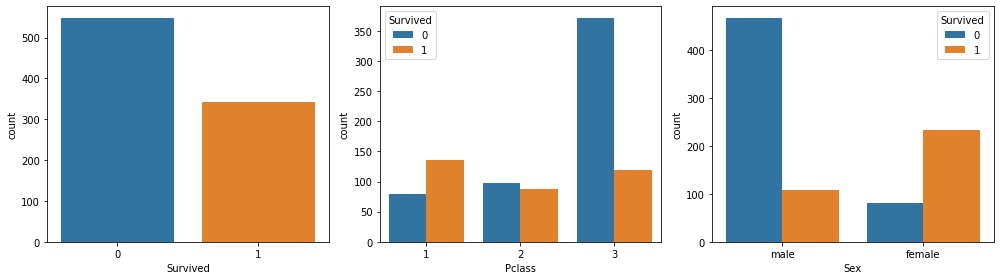

In [55]:
import seaborn as sns

plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sb.countplot(x=titanic["Survived"])

plt.subplot(1,3,2)
sb.countplot(x = titanic['Pclass'], hue = titanic['Survived'])

plt.subplot(1,3,3)
sb.countplot(x = titanic['Sex'], hue = titanic['Survived'])
plt.tight_layout()

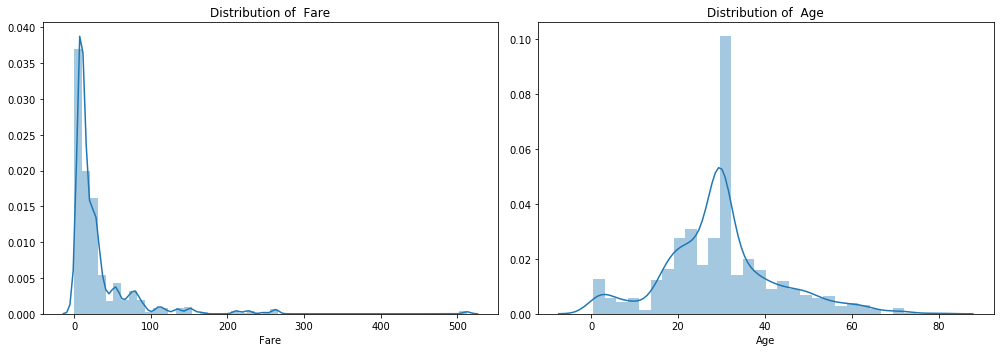

In [54]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sb.distplot(titanic.Fare).set(title = "Distribution of  Fare")

plt.subplot(1,2,2)
sb.distplot(X["Age"]).set(title = "Distribution of  Age")
plt.tight_layout()

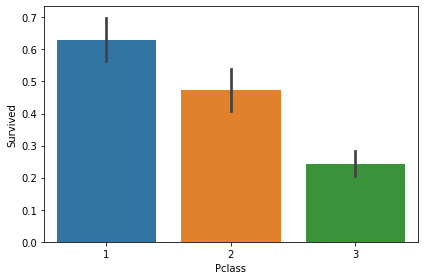

In [56]:
sb.barplot(x=titanic["Pclass"],y=titanic["Survived"])
plt.tight_layout()

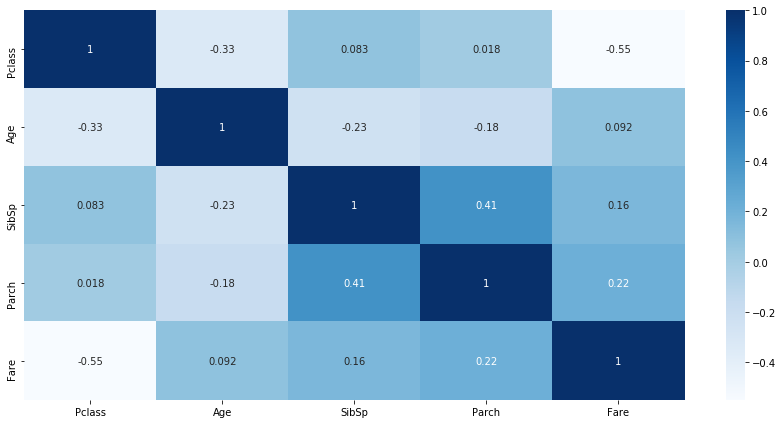

In [61]:
plt.figure(figsize=(12,6))
sb.heatmap(X.corr(), annot=True, cmap = 'Blues')
plt.tight_layout()

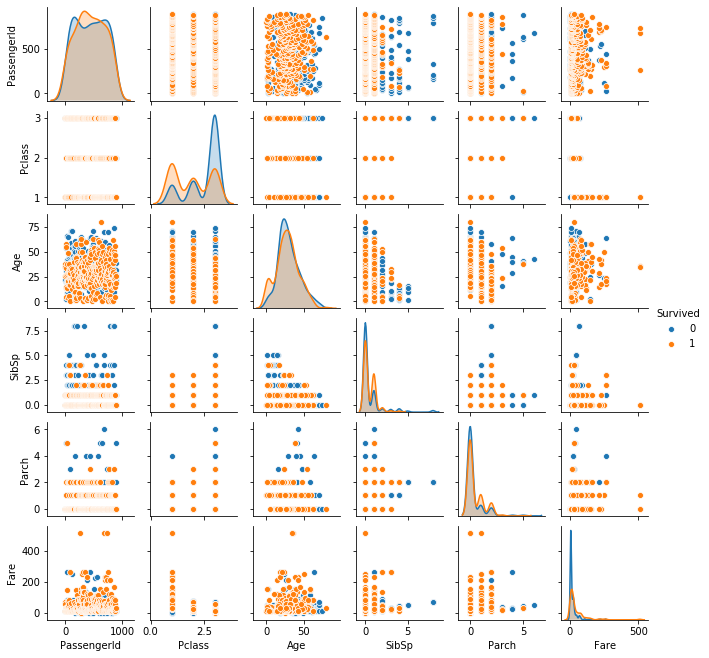

In [72]:
sb.pairplot(titanic, hue='Survived', height = 1.5)

In [75]:
X.Sex = pd.get_dummies(X.Sex).values

C:\Users\PRANAY\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


## 3. Model Building

In [77]:
# Spliting dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
# importing classifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
print(f'Shape of train feature:{X_train.shape}')
print(f'Shape of test feature :{X_test.shape}')
print(f'Shape of train target :{y_train.shape}')
print(f'Shape of test target  :{y_test.shape}')


Shape of train feature:(623, 6)
Shape of test feature :(268, 6)
Shape of train target :(623,)
Shape of test target  :(268,)


In [80]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter

import scikitplot.metrics as skplt

In [81]:
# Instantiating Decision tree model
model_dt = DecisionTreeClassifier()
# Fitting on train data
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
# Predicting on test dataset
y_pred = model_dt.predict(X_test)

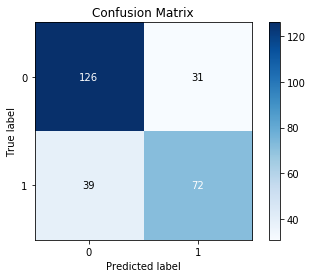

In [83]:
# Plotting the confusion matrix
skplt.plot_confusion_matrix(y_test ,y_pred)

In [84]:
accuracy_score(y_test,y_pred)

0.7388059701492538

In [93]:
model_dt.score(X_train,y_train)

0.9807383627608347

In [94]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [98]:
grid_search = GridSearchCV(estimator=model_dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [101]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 5, 'splitter': 'random'}


In [102]:
grid_search.best_score_

0.8314451612903226

In [104]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth =20, min_samples_leaf= 6, min_samples_split= 5, splitter ='random')
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [112]:
# Predicting on test dataset
y_pred = DT.predict(X_test)

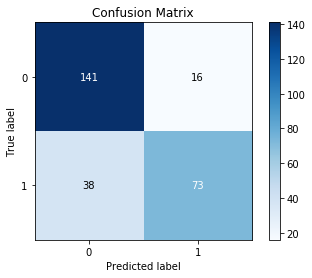

In [113]:
# Plotting the confusion matrix
skplt.plot_confusion_matrix(y_test ,y_pred)

In [108]:
DT.score(X_train,y_train)

0.8426966292134831

In [114]:
accuracy_score(y_test,y_pred)

0.7985074626865671

In [115]:
import pickle
# Writing different model files to file
with open( 'DTmodelForPrediction.sav', 'wb') as f:
    pickle.dump(DT,f)
